## Exam Anthony Ramelo 20499391

#### 1.	I have recently started an apiary. Currently, I have 4 beehives and understand that each hive can house up to 80,000 bees during the most active part of the season (the summer). Being a data driven beekeeper, I have been keeping track of the health of my hives plus the exogenous factors I believe help or harm the hive. I’ve combined this data with some other data sourced on the internet to ensure I have a large enough sample size for analysis. Use the data on the tab ‘Bees’ to help me understand more about my hive. You can treat the data as representing a single hive over time.  
#### 1a.	Build a model to predict the total number of bees I will have in that hive in any given month. Explain your model building process (2 marks) and paste your final model below (1 mark).



### Answer
Steps taken to build model(see below for all steps taken to build the model):
1. We first imported the data 
2. Looked for any null values and found that there are none in the dataset
3. Test for Heteroskaticty Residual Plot - It does not look like it has heteroskaticity since the data is scattered
4. Test for Breuch-Pagan - Since the P value (0.3436609807032775) is higher  than 0.05 it does not have heteroskaticity
5. Check for Outliers - We could see there is 1 outlier in the top right corner we would need to investigate
6. Check to see if the data is normally distributed - from the plot it looks to be right skewed
7. Create the Model
8. Adjust Model based on findings

<br/>
I have removed Total Precipitation, Major Storm and Avg_Wind_Speed since they have a P value over 0.05.
Although Avg_Temp and Low_temp have a high P value, when removing a single one the R2 decreased. 
<br/> final model = 'Bee_Count ~ Avg_Temp + Low_Temp + High_Temp + Avail_Flower_Species'



In [121]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from scipy.stats import norm, probplot
from sklearn.preprocessing import StandardScaler

db_dir = os.getcwd()
one = pd.read_excel(db_dir + r'/data/MMA860_Exam_Data_2024.xlsx', sheet_name='Bees' )
#Describe the data

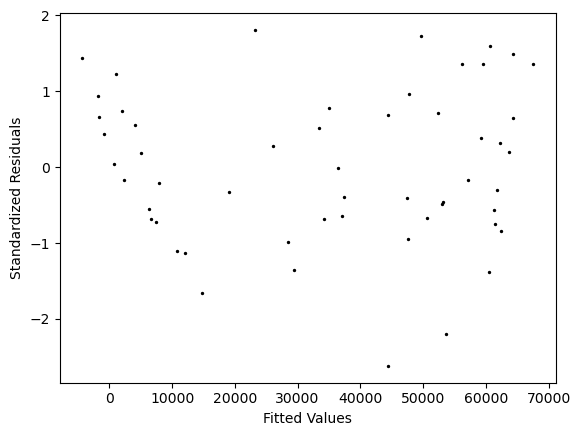

{'LM Statistic': 4.490621462560314, 'LM-Test p-value': 0.3436609807032775, 'F-Statistic': 1.1111048965149992, 'F-Test p-value': 0.3619925774467788}


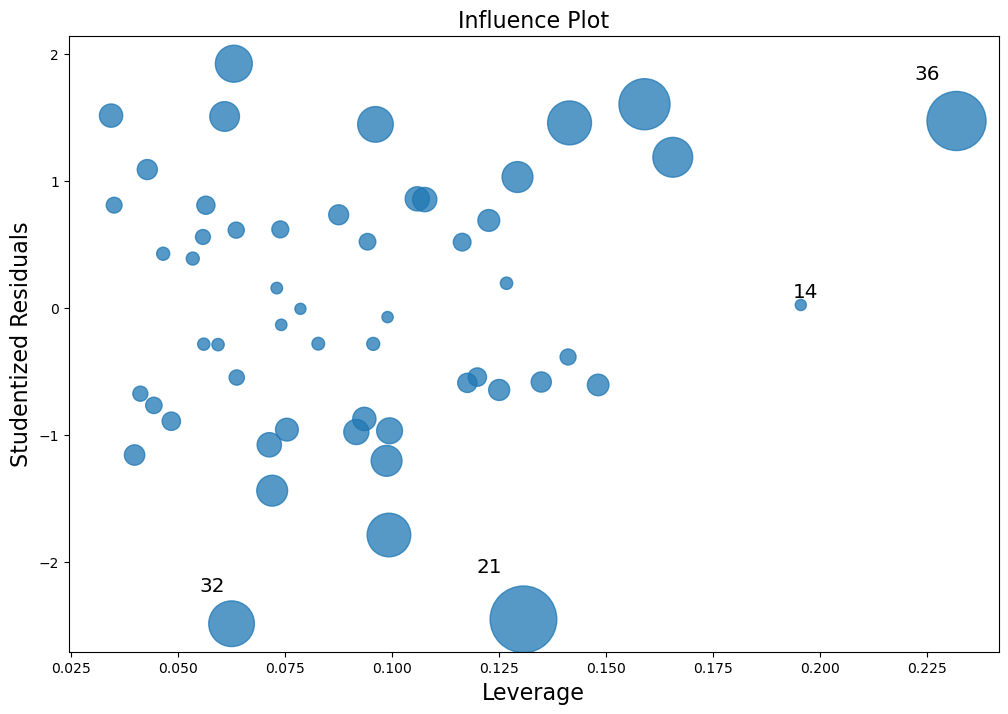

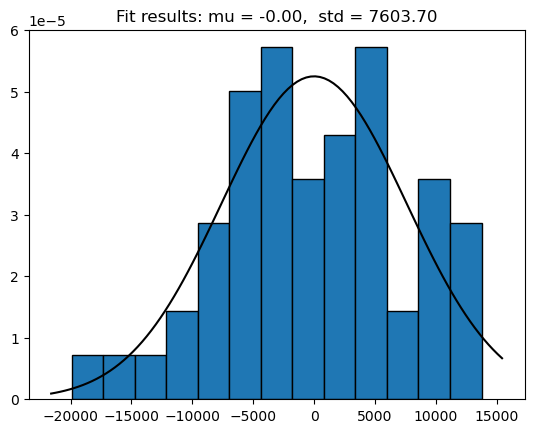

In [122]:
# Testing for Heteroskacticity
import os.path as osp
import pandas as pd
from sklearn.linear_model import LinearRegression
import os
X_train = one[['Avg_Temp',  'Low_Temp' , 'High_Temp' , 'Total_Precip' , 'Major_Storm' , 'Avg_Wind_Speed' ,'Avail_Flower_Species']].values
y_train = one[['Bee_Count']].values
reg = LinearRegression().fit(X_train,y_train)
residuals = y_train - reg.predict(X_train)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(reg.predict(X_train),norm_residuals,c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

import statsmodels.api as sm
#Perform the Breuch-Pagan Test by running this line
bp = het_breuschpagan(model.resid,model.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))

# David's Cook Model to identify Outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.show()

# Checking to see if the data is normal
from scipy.stats import norm

# Fit a normal distribution to the data:
mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

### 1b.	How do you know this is the best model? Bee specific.  (2 marks)

### Answer:
I have removed Total Precipitation, Major Storm and Avg_Wind_Speed since they have a P value over 0.05.
Although Avg_Temp and Low_temp have a high P value, when removing a single one the R2 decreased. 

In [123]:
model = 'Bee_Count ~ Avg_Temp + Low_Temp + High_Temp + Total_Precip + Major_Storm + Avg_Wind_Speed + Avail_Flower_Species'
onemodel = ols(model,one).fit()
print(onemodel.summary())

                            OLS Regression Results                            
Dep. Variable:              Bee_Count   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     63.42
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.70e-21
Time:                        20:31:32   Log-Likelihood:                -559.19
No. Observations:                  54   AIC:                             1134.
Df Residuals:                      46   BIC:                             1150.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3396.5960 

In [124]:
model = 'Bee_Count ~ Avg_Temp + Low_Temp + High_Temp + Avail_Flower_Species'
model = ols(model,one).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bee_Count   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           3.83e-24
Time:                        20:31:35   Log-Likelihood:                -560.18
No. Observations:                  54   AIC:                             1130.
Df Residuals:                      49   BIC:                             1140.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              961.8231 

### 1c.	Does temperature have an impact on the number of bees? Answer this question using a formal test. State the null hypothesis, the p-value, and your conclusion. (3 marks) 

### Answer:
HO = temp does not effect bees
<br/>H1 = temp does effect bees
<br/>Since the P value (6.133875490664779e-12) is less than 0.05, we reject H0 and embrace the H1 that there is no difference between the temperatures.

In [125]:
# Hypothesis Testing for the different circuit: Road, Race and Street

hypothesis = '(Avg_Temp=0, Low_Temp=0, High_Temp=0)'
#Pass the hypothesis to the Wald_Test
print(model.wald_test(hypothesis))

<F test: F=array([[33.57008662]]), p=6.133875490664779e-12, df_denom=49, df_num=3>


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


#### 1d.	If the total number of bees ever goes beyond 95,000, the hive will swarm. Yes, this is a real thing, and yes, it is terrifying. Not to mention, you often lose your bees! The good news is, if you can predict a swarm, you can give them more room and prevent it. Use the data on the tab ‘NextSeason’ to predict the size of the beehive in each month of the next season. The data is sourced directly from the Farmer’s Almanac. Should I be worried about swarming if the forecasted weather is correct? Why or why not? (4 marks) 

#### Answer
Looking at the predicted values none of them are higher then 95,000. If the next season data is accurate and we trust our model of 90.4% accuracy, we could safely say there will be no bee swarms next season.
<br/>
<br/>The R2 for the train data is 90.5% and for test data is 90.4%. Meaning that the model is 90.4% accurate. Since the test R2 is lower than test data, it is also not overfitting.

In [117]:
db_dir = os.getcwd()
oned = pd.read_excel(db_dir + r'/data/MMA860_Exam_Data_2024.xlsx', sheet_name='Next_Season' )

from sklearn.model_selection import train_test_split

#split the data for train and test
X = one[['Avg_Temp',  'Low_Temp' , 'High_Temp' , 'Total_Precip' , 'Major_Storm' , 'Avg_Wind_Speed' ,'Avail_Flower_Species']].values
y = one[['Bee_Count']].values
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.95,random_state=0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
model = 'Bee_Count ~ Avg_Temp + Low_Temp + High_Temp + Avail_Flower_Species'
predictmodel = ols(model,one).fit()
predictmodel.predict(oned)


0     54997.199469
1     47448.966170
2     39897.369666
3     21796.672988
4      -495.279096
5      1424.276647
6     -3699.900460
7     12141.584454
8     45647.171702
9     53668.933396
10    57974.816714
11    68502.054452
dtype: float64

In [94]:
# Determine the R2 for the train data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import sqrt
print("R^2:",reg.score(X_train,y_train))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_train,reg.predict(X_train))))
print("Mean Absolute Error:",mean_absolute_error(
    y_train,reg.predict(X_train)))



R^2: 0.9057509790131151
Root Mean Squared Error: 7554.902968369947
Mean Absolute Error: 6270.087386622663


In [96]:
# Determine the R2 for the test data
print("R^2:",reg.score(X_test,y_test))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_test,reg.predict(X_test))))
print("Mean Absolute Error:",mean_absolute_error(
    y_test,reg.predict(X_test))) 

R^2: 0.9045731424400981
Root Mean Squared Error: 8528.000172310363
Mean Absolute Error: 6601.908188336435


##### 2.	You are interviewing for a job at a prestigious consulting firm that focuses on solving business problems using analytics. The following are the questions asked by the recruiting manager – they are based on real client problems and questions.  For each question, provide a clear and concise answer that shows you understand the material from both a managerial and statistical perspective.
##### a.	Your client is proposing a satisfaction survey which should generate about 5000 responses.  One of the questions has potential responses ‘very dissatisfied’, ‘dissatisfied’, ‘no opinion’, ‘satisfied’ and ‘very satisfied’.  Since there is a natural ordering to these results, he is not sure if he should code the results 1,2,3,4,5 respectively or -2,-1,0,1,2 respectively. Explain and justify your thoughts on how the data should be coded, and any strengths and weaknesses the choice of coding has. 3 marks


#### Answer:
We suggest to use the scale 1,2,3,4,5 as this has more of hierarchy to the satisfaction scale. 'very dissatisfied' as 0 and ‘very satisfied’ as 5.  
Using '-2,-1,0,1,2' is good method since it looks like 0 is centered around 'no opinion'. But we do not suggest it, because it is tougher to code and analyseif we compare this to other surveys that use a hierarchy starting from 0 (being the lowest score).
<br/> Using the '1,2,3,4,5' is easier for analysis it also aligns well with common statistical tools and methods that assume higher numbers are better.


#### 2b.	How could you find a multi-dimensional outlier in a linear regression context? What should you do about it? 3 marks

#### Answer:
We could identify outliers by using Cook’s Distance plot to identify observations with high leverage and observations outside those lines have high leverage and are worth investigating.

After identifying the outlier We would need to further examine the outlier to see if it affects the results of our model. This could be done a number of ways:
1. removing observation the since it is an error.
2. Understanding the outlier to determine if the outlier should be included in the model.
3. Fix the data by performing a natural log or squaring a variable


#### 2c.Your client is worried about the restrictions imposed on a linear model. She suspects some of the relationships have non-linear patterns like decreasing returns to scale or an exponential shape. What would you tell her?

#### Answer
Linear regression is when there is relationship between the dependent and independent variables and non-linear patterns occur when the relationship between variables isn’t a straight line. There are some statistical tools to help identify the non-linear patterns and to correct them. We could perform two variable transformations, natural log (ln) and squaring a variable. 